**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Part I. Import and Inspect Data

## 1.1 import packages

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10) 
plt.rcParams["lines.linewidth"] = 2 
plt.style.use("ggplot")

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose #Describes the time data
from statsmodels.tsa.stattools import adfuller #Check if data is stationary
from statsmodels.graphics.tsaplots import plot_acf #Compute lag for ARIMA
from statsmodels.graphics.tsaplots import plot_pacf #Compute partial lag for ARIMA
from statsmodels.tsa.arima_model import ARIMA #Predictions and Forecasting


from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error


In [3]:
random.seed(42)

## 1.2 import train and test data for regression

In [4]:
R_train = pd.read_csv(
    "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Haowen-STATS201-Final/main/data/Prediction/Regression_Train.csv")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Haowen-STATS201-Final/main/data/Prediction/Regression_Test.csv")

In [5]:
R_train["Date"] = pd.to_datetime(R_train.Date, dayfirst=True)
R_train = R_train.set_index("Date", inplace=False)
R_test["Date"] = pd.to_datetime(R_test.Date, dayfirst=True)
R_test = R_test.set_index("Date", inplace=False)


In [6]:
R_train.isna().sum()

Close         0
6-month-ma    1
dtype: int64

In [7]:
R_train=R_train.dropna()

In [8]:
R_test.isna().sum()

Close         0
6-month-ma    0
dtype: int64

In [9]:
R_train.head()

,Close,6-month-ma
Date,,
2015-08-08,0.753325,2.772120
2015-08-09,0.701897,1.762723
2015-08-10,0.708448,1.409114
2015-08-11,1.067860,1.233947
2015-08-12,1.217440,1.200730


In [10]:
R_test.head()

,Close,6-month-ma
Date,,
2019-09-27,174.710999,189.118909
2019-09-28,174.572891,182.318041
2019-09-29,170.503479,176.155960
2019-09-30,179.872208,170.919655
2019-10-01,177.340424,172.879901


# Part II. Machine Learning Regression

## 2.1 important global packages

In [11]:
from sklearn.metrics import r2_score

## 2.2 Define the Train and Test (X, y)

In [12]:
R_train.head()

,Close,6-month-ma
Date,,
2015-08-08,0.753325,2.772120
2015-08-09,0.701897,1.762723
2015-08-10,0.708448,1.409114
2015-08-11,1.067860,1.233947
2015-08-12,1.217440,1.200730


In [14]:
X_train = pd.DataFrame(R_train['6-month-ma'])
y_train = pd.DataFrame(R_train['Close'])

In [15]:
R_test.head()

,Close,6-month-ma
Date,,
2019-09-27,174.710999,189.118909
2019-09-28,174.572891,182.318041
2019-09-29,170.503479,176.155960
2019-09-30,179.872208,170.919655
2019-10-01,177.340424,172.879901


In [16]:
X_test = pd.DataFrame(R_test['6-month-ma'])
y_test = pd.DataFrame(R_test['Close'])

In [17]:
y_test.head()

,Close
Date,
2019-09-27,174.710999
2019-09-28,174.572891
2019-09-29,170.503479
2019-09-30,179.872208
2019-10-01,177.340424


## 2.3 Linear Regression

In [40]:
from sklearn import linear_model

In [41]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [42]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.9848144130098939


In [43]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,189.639593
1,182.881833
2,176.758810
3,171.555695
4,173.503516
...,...
750,3598.547199
751,3665.541396
752,3715.514369
753,3757.941563


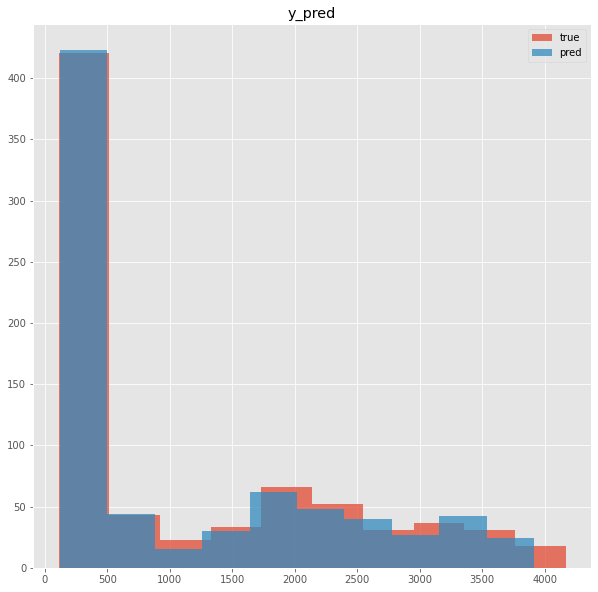

In [44]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [45]:
y_plot = y_test.copy()
y_plot["y_pred"] = y_pred.values
y_plot.head()

,Close,y_pred
Date,,
2019-09-27,174.710999,189.639593
2019-09-28,174.572891,182.881833
2019-09-29,170.503479,176.758810
2019-09-30,179.872208,171.555695
2019-10-01,177.340424,173.503516


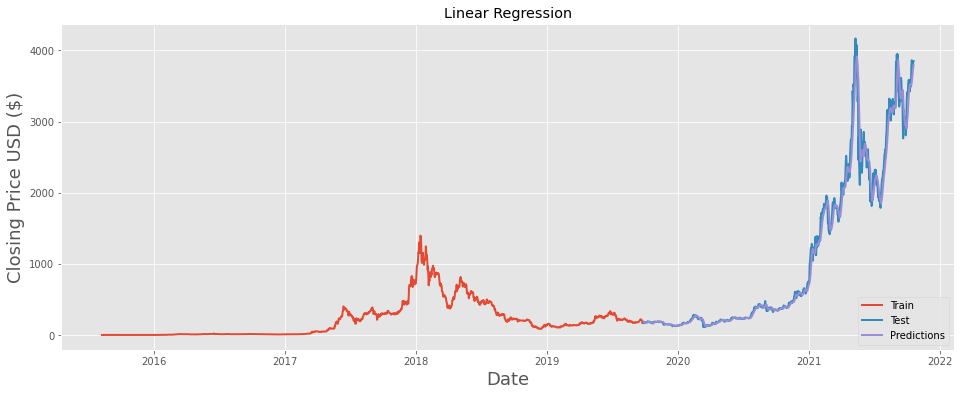

In [46]:
plt.figure(figsize=(16, 6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(R_train['Close'])
plt.plot(y_plot[['Close', 'y_pred']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

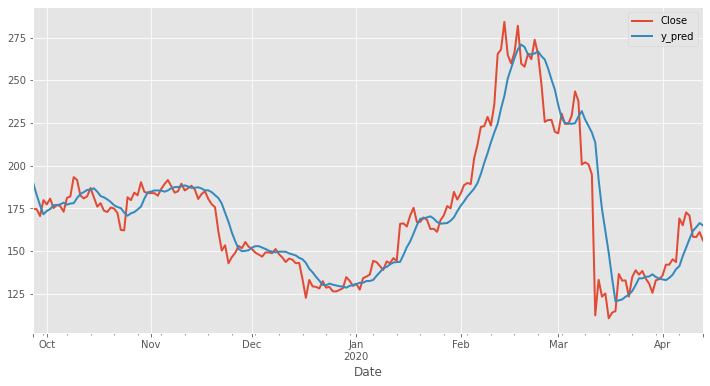

In [47]:
y_plot[['Close', 'y_pred']].iloc[:200].plot(
    figsize=(12, 6)).autoscale(axis='x', tight=True)

## 2.3 Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-30-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [31]:
# calculate R2
from sklearn.metrics import r2_score

In [32]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: 0.3934938372172445


In [33]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,231.761032
1,198.841175
2,181.104160
3,167.829363
4,146.331008
...,...
750,1208.334510
751,1208.334510
752,1208.334510
753,1208.334510


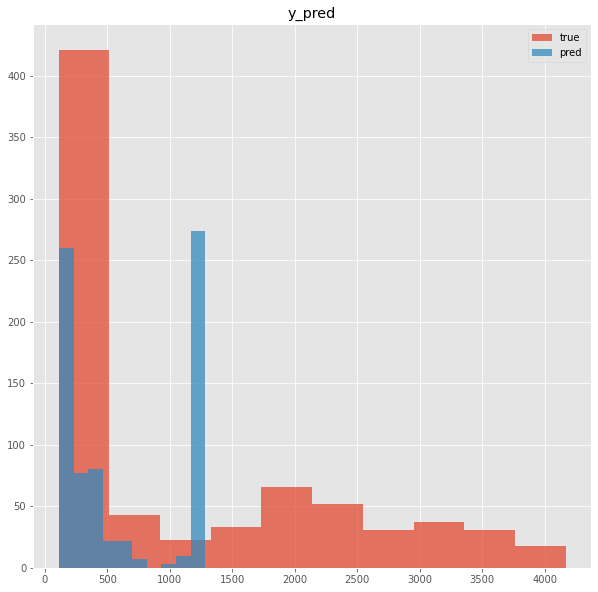

In [34]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [35]:
y_plot = y_test.copy()
y_plot["y_pred"] = y_pred.values
y_plot.head()

,Close,y_pred
Date,,
2019-09-27,174.710999,231.761032
2019-09-28,174.572891,198.841175
2019-09-29,170.503479,181.104160
2019-09-30,179.872208,167.829363
2019-10-01,177.340424,146.331008


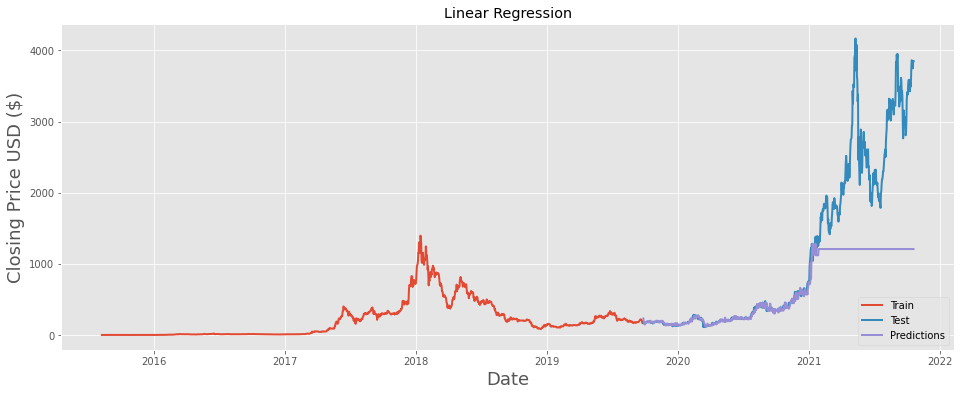

In [36]:
plt.figure(figsize=(16, 6))
plt.title('Linear Regression')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(R_train['Close'])
plt.plot(y_plot[['Close', 'y_pred']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


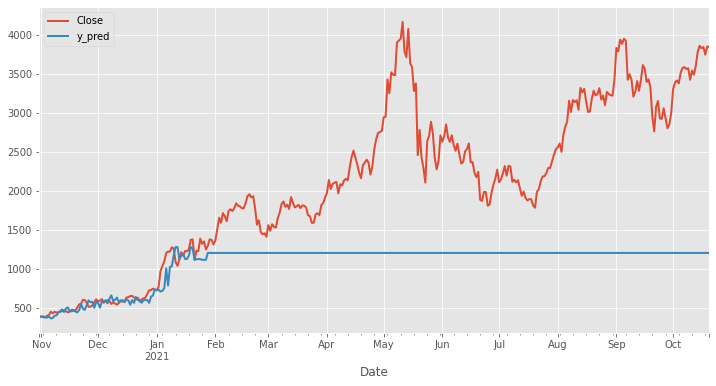

In [38]:
y_plot[['Close', 'y_pred']].iloc[400:].plot(
    figsize=(12, 6)).autoscale(axis='x', tight=True)
